<h1 style="text-align:center; font-family:Bahnschrift;">⚾SALARY PREDICTION OF BASEBALL PLAYERS WITH LINEAR REGRESSION🧢</h1>

![](https://www.pennlive.com/resizer/wj9PmWZEJS8IZREn7xEYRp-hp8Q=/1280x0/smart/arc-anglerfish-arc2-prod-advancelocal.s3.amazonaws.com/public/XWVFUCNOLFCAXLQGRSCUKL4SGE.jpg)

<a id='intro'></a>
<h1 style="text-align:center; font-family:Bahnschrift;">INTRODUCTION</h1>

## TOC
* <a href='#intro'>Introduction</a>
    - <a href='#business'>Business Problem</a>
    - <a href='#dataset'>Dataset Info</a>
    - <a href='#import'>Importing Dataset and Libraries</a>
* <a href='#eda'>Exploratory Data Analysis</a>
    - <a href='#info'>Basic Information</a>
    - <a href='#missing'>Missing Values</a>
* <a href='#engineering'>Feature Engineering</a>
    - <a href='#outliers'>Outliers</a>
    - <a href='#extract'>Feature Extraction</a>
    - <a href='#correlation'>Correlation</a>
    - <a href='#encoding'>Encoding</a>
* <a href='#model'>Modelling</a>
    - <a href='#scaling'>Scaling</a>
    - <a href='#split'>Train-Test Split</a>
    - <a href='#fitpredict'>Fit and Predict</a>
    - <a href='#validation'>Validation Methods</a>
    - <a href='#importance'>Feature Importance</a>
    - <a href='#formula'>Formula</a>

<a id= 'business'></a>
<h4 style='font-family:Bahnschrift'>Business Problem</h4>

<span style='font-size:17px'>Can we build a machine learning model to accurately predict salaries of the baseball player based on their seasonal and career statisctics?</span>

<a id= 'dataset'></a>
<h4 style='font-family:Bahnschrift'>Dataset Information</h4>

<span style='font-size:17px'>
A data frame with 322 observations of major league players on the following 20 variables.

* AtBat: Number of times at bat in 1986
* Hits: Number of hits in 1986
* HmRun: Number of home runs in 1986
* Runs: Number of runs in 1986
* RBI: Number of runs batted in in 1986
* Walks: Number of walks in 1986
* Years: Number of years in the major leagues
* CAtBat: Number of times at bat during his career
* CHits: Number of hits during his career
* CHmRun: Number of home runs during his career
* CRuns: Number of runs during his career
* CRBI: Number of runs batted in during his career
* CWalks: Number of walks during his career
* League: A factor with levels A and N indicating player's league at the end of 1986
* Division: A factor with levels E and W indicating player's division at the end of 1986
* PutOuts: Number of put outs in 1986
* Assists: Number of assists in 1986
* Errors: Number of errors in 1986
* Salary: 1987 annual salary on opening day in thousands of dollars
* NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987</span>

<a id= 'import'></a>
<h4 style='font-family:Bahnschrift'>Importing Dataset and Libraries</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_theme(style='whitegrid')

In [2]:
df = pd.read_csv('../input/hitters-baseball-data/Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.50,N


In [3]:
# making column names lowercase for just personal preference

df.columns = df.columns.str.lower()
df.columns

Index(['atbat', 'hits', 'hmrun', 'runs', 'rbi', 'walks', 'years', 'catbat',
       'chits', 'chmrun', 'cruns', 'crbi', 'cwalks', 'league', 'division',
       'putouts', 'assists', 'errors', 'salary', 'newleague'],
      dtype='object')

<a id='eda'></a>
<h1 style="text-align:center; font-family:Bahnschrift;">EXPLORATORY DATA ANALYSIS</h1>

<a id='info'></a>
<h4 style='font-family:Bahnschrift'>Basic Information</h4>

In [4]:
df.shape

#322 rows, 20 columns

(322, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   atbat      322 non-null    int64  
 1   hits       322 non-null    int64  
 2   hmrun      322 non-null    int64  
 3   runs       322 non-null    int64  
 4   rbi        322 non-null    int64  
 5   walks      322 non-null    int64  
 6   years      322 non-null    int64  
 7   catbat     322 non-null    int64  
 8   chits      322 non-null    int64  
 9   chmrun     322 non-null    int64  
 10  cruns      322 non-null    int64  
 11  crbi       322 non-null    int64  
 12  cwalks     322 non-null    int64  
 13  league     322 non-null    object 
 14  division   322 non-null    object 
 15  putouts    322 non-null    int64  
 16  assists    322 non-null    int64  
 17  errors     322 non-null    int64  
 18  salary     263 non-null    float64
 19  newleague  322 non-null    object 
dtypes: float64

<a id='missing'></a>
<h4 style='font-family:Bahnschrift'>Missing Values</h4>

<AxesSubplot:>

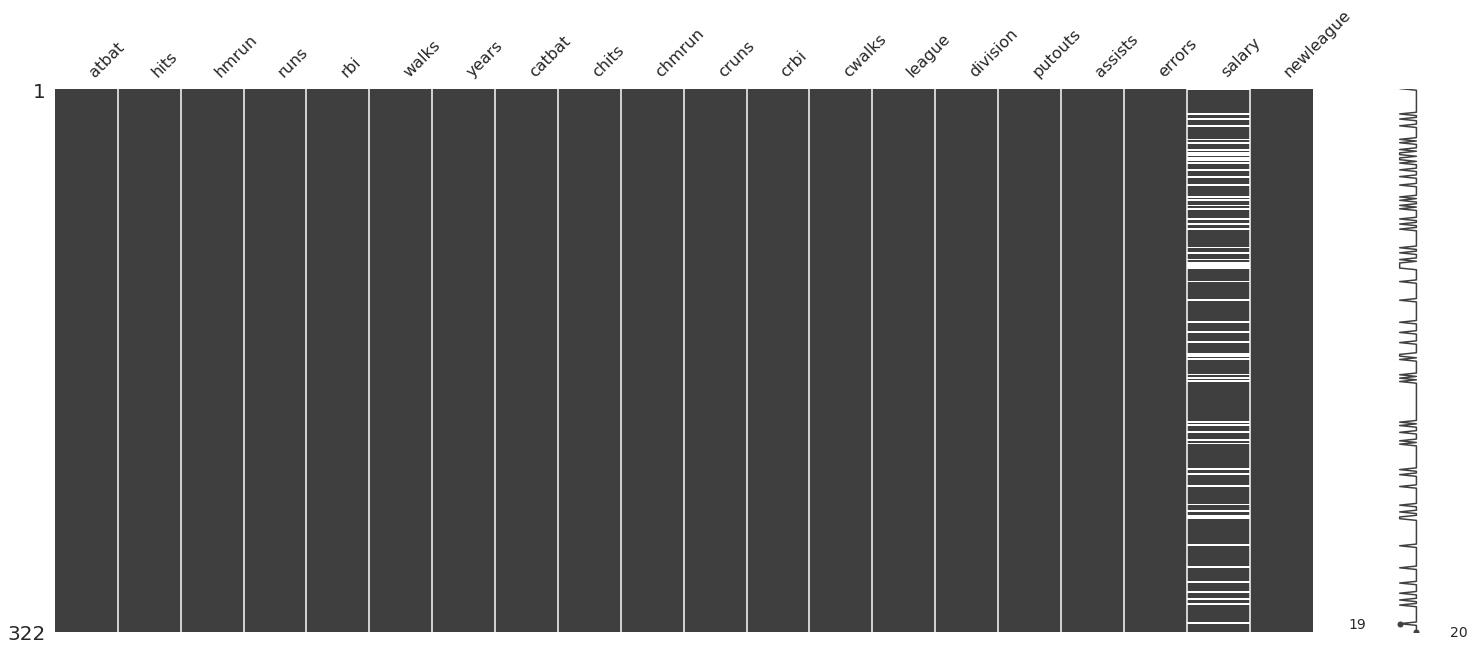

In [6]:
#visualizing missing values

msno.matrix(df)

In [7]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [8]:
# missing values and ratios

missing_values_table(df)

        n_miss  ratio
salary      59  18.32


In [9]:
# league and division of players have effects on their salaries 

df.groupby(['league','division']).agg({'salary':['mean','count']})

salary      
                  mean count
league division             
A      E        670.85    68
       W        418.59    71
N      E        572.35    61
       W        487.26    63

In [10]:
# filling missing values according to information above

df.salary = df.salary.fillna(df.groupby(['league','division'])['salary'].transform('mean'))
df.salary.head()

0   670.85
1   475.00
2   480.00
3   500.00
4    91.50
Name: salary, dtype: float64

<a id='engineering'></a>
<h1 style="text-align:center; font-family:Bahnschrift;">FEATURE ENGINEERING</h1>

<a id='outliers'></a>
<h4 style='font-family:Bahnschrift'>Outliers</h4>

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20, show_cols=False):
    """
    Returns the categorical, numerical and categorical but cardinal variables.
    Note: Categorical variables includes numerical values that have low unique values than 10.

    Parameters
    ------
        dataframe: dataframe
                Dataframe that wanted to get column types
        cat_th: int, optional
                Threshold value for the numerical but categorical values
        car_th: int, optinal
                Threshold value for the categorical but cardinal values

    Returns
    ------
        cat_cols: list
                Categorical variables
        num_cols: list
                Numeric variables
        cat_but_car: list
                Categorical but cardinal values

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    if show_cols:
        print(f"""Categorical Variables={cat_cols},\nNumerical Variables={num_cols},\nCategorical but Cardinal Variables={cat_but_car}""")
    
    return cat_cols, num_cols, cat_but_car

In [12]:
# splitting columns into useful groups

cat_cols, num_cols, cat_but_car = grab_col_names(df,show_cols=True)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0
Categorical Variables=['league', 'division', 'newleague'],
Numerical Variables=['atbat', 'hits', 'hmrun', 'runs', 'rbi', 'walks', 'years', 'catbat', 'chits', 'chmrun', 'cruns', 'crbi', 'cwalks', 'putouts', 'assists', 'errors', 'salary'],
Categorical but Cardinal Variables=[]


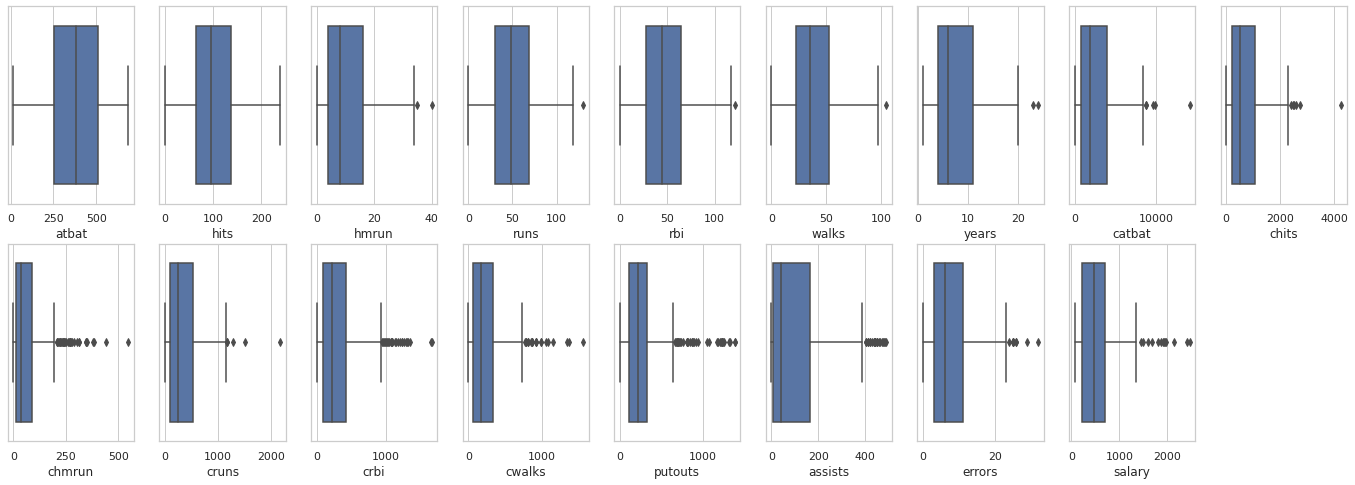

In [13]:
# Boxplot of every numeric variables to see the summary of the outlier values

plt.rcParams["figure.figsize"] = (24,8)

for index, num_col in enumerate(num_cols):
    plt.subplot(2,9,index+1)
    sns.boxplot(x=num_col,data=df)
    
plt.show()

In [14]:
# getting a more detailed describe table to determine outlier thresholds

df.describe([0.01,0.05,0.25,0.5,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
atbat,322.00,380.93,153.40,16.00,20.42,161.00,255.25,379.50,512.00,584.90,609.90,658.59,687.00
hits,322.00,101.02,46.45,1.00,4.42,39.00,64.00,96.00,137.00,163.00,174.00,210.79,238.00
hmrun,322.00,10.77,8.71,0.00,0.00,0.00,4.00,8.00,16.00,24.00,28.95,33.00,40.00
runs,322.00,50.91,26.02,0.00,1.21,17.00,30.25,48.00,69.00,89.00,94.00,107.79,130.00
rbi,322.00,48.03,26.17,0.00,2.00,14.00,28.00,44.00,64.75,86.00,96.00,112.37,121.00
walks,322.00,38.74,21.64,0.00,1.00,11.05,22.00,35.00,53.00,69.90,78.00,93.58,105.00
years,322.00,7.44,4.93,1.00,1.00,1.00,4.00,6.00,11.00,15.00,17.00,19.79,24.00
catbat,322.00,2648.68,2324.21,19.00,41.00,216.50,816.75,1928.00,3924.25,6123.40,7125.60,8749.97,14053.00
chits,322.00,717.57,654.47,4.00,9.84,54.00,209.00,508.00,1059.25,1659.60,2017.15,2500.34,4256.00
chmrun,322.00,69.49,86.27,0.00,0.00,2.00,14.00,37.50,90.00,194.90,265.65,373.12,548.00


In [15]:
# function that returning up and low limits for outlier detection

def outlier_thresholds(dataframe,colname,q1=0.01, q3=0.99):
    
    quartile1 = dataframe[colname].quantile(q1)
    quartile3 = dataframe[colname].quantile(q3)
    
    interquantile_range = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [16]:
def check_outlier(low_limit, up_limit, dataframe, colname):
    if dataframe[(dataframe[colname] > up_limit) | (dataframe[colname] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [17]:
def replace_with_thresholds(low_limit, up_limit,dataframe,colname):
    
    dataframe.loc[dataframe[colname] > up_limit,colname] = up_limit
    dataframe.loc[dataframe[colname] < low_limit,colname] = low_limit

In [18]:
# Columns that have outliers

outlier_cols = []

for col in num_cols:
    low_limit, up_limit = outlier_thresholds(df,col)
    if check_outlier(low_limit,up_limit,df,col):
        outlier_cols.append(col)
    

In [19]:
# There is no outlier value with the thresholds that we provided
outlier_cols

[]

<a id='extract'></a>
<h4 style='font-family:Bahnschrift' >Feature Extraction</h4>

In [20]:
#AB/HR At bats per home run - at bats divided by home runs
df['ab/hr'] = df.apply(lambda x: x.atbat / x.hmrun if x.hmrun != 0 else 0,axis=1) 

df['c_ab/ht'] = df.apply(lambda x: x.catbat / x.chmrun if x.chmrun != 0 else 0,axis=1)

In [21]:
#BA - Batting average (also abbreviated AVG) - hits divided by at bats
df['avg'] = df.apply(lambda x: x.hits / x.atbat if x.atbat != 0 else 0,axis=1)

df['cavg'] = df.apply(lambda x: x.chits / x.catbat if x.catbat != 0 else 0,axis=1)

<a id='correlation'></a>
<h4 style='font-family:Bahnschrift' >Correlation</h4>

In [22]:
# variable correlations with the target

df.corrwith(df['salary']).sort_values(ascending=False)[1:]

cruns      0.49
crbi       0.49
chits      0.48
catbat     0.46
chmrun     0.44
cwalks     0.43
cavg       0.40
rbi        0.40
walks      0.40
hits       0.38
runs       0.37
years      0.34
atbat      0.34
hmrun      0.31
putouts    0.27
avg        0.16
assists    0.03
errors     0.00
c_ab/ht   -0.11
ab/hr     -0.14
dtype: float64

In [23]:
# correlation map

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,atbat,hits,hmrun,runs,rbi,walks,years,catbat,chits,chmrun,cruns,crbi,cwalks,putouts,assists,errors,salary,ab/hr,c_ab/ht,avg,cavg
atbat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.341871,0.059034,0.025430,0.363449,0.448022
hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.384656,0.026439,-0.013565,0.527751,0.562829
hmrun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.307808,-0.418247,-0.375996,0.193560,0.240383
runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.367341,-0.043983,-0.016696,0.433811,0.463297
rbi,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.400851,-0.213033,-0.246581,0.360311,0.413503
walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.398176,-0.041938,-0.035183,0.233026,0.301281
years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.343159,-0.133536,-0.127052,0.085132,0.327404
catbat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.458666,-0.125835,-0.113867,0.120476,0.420998
chits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.483302,-0.123964,-0.117576,0.155316,0.470426
chmrun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.443434,-0.253584,-0.259989,0.040044,0.278121


<a id='encoding'></a>
<h4 style='font-family:Bahnschrift' >Encoding</h4>

In [24]:
# encoding object type variables to numerical for regression model
encoder = LabelEncoder()

for col in cat_cols + ['years']:
    df[col] = encoder.fit_transform(df[col])

<a id='model'></a>
<h1 style='text-align:center; font-family:Bahnschrift'>MODELLING</h1>

<a id='scaling'></a>
<h4 style='font-family:Bahnschrift'>Scaling</h4>

In [25]:
# scaling numerical values to avoid generating disadvantages for lower values

scaler = StandardScaler()

num_cols = df.describe().columns.drop('salary')

df[num_cols] = pd.DataFrame(scaler.fit_transform(df[num_cols]),columns=num_cols)

<a id='split'></a>
<h4 style='font-family:Bahnschrift'>Train-Test Split</h4>

In [26]:
# X for variables
# y for target

X= df.drop('salary',axis=1)
y= df.salary

In [27]:
# Splitting a dataset with low observations is not the best choice however it is worth to see the results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

<a id='fitpredict'></a>
<h4 style='font-family:Bahnschrift'>Fit and Predict</h4>

In [28]:
# fitting linear regression models

lm = LinearRegression().fit(X_train,y_train)

In [29]:
# predictions

y_pred = lm.predict(X_test)

<a id='validation'></a>
<h4 style='font-family:Bahnschrift'>Validation Methods</h4>

In [30]:
print(f"""
R SQUARE: {lm.score(X_train, y_train)}
RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}
10 FOLD CV: {np.mean(np.sqrt(-cross_val_score(lm,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))}
""")

# 10 fold cv has been used because of the lack of observation


R SQUARE: 0.4692280003386875
RMSE: 357.7245900136137
10 FOLD CV: 323.51345445486703



<a id='importance'></a>
<h4 style='font-family:Bahnschrift'>Feature Importance</h4>

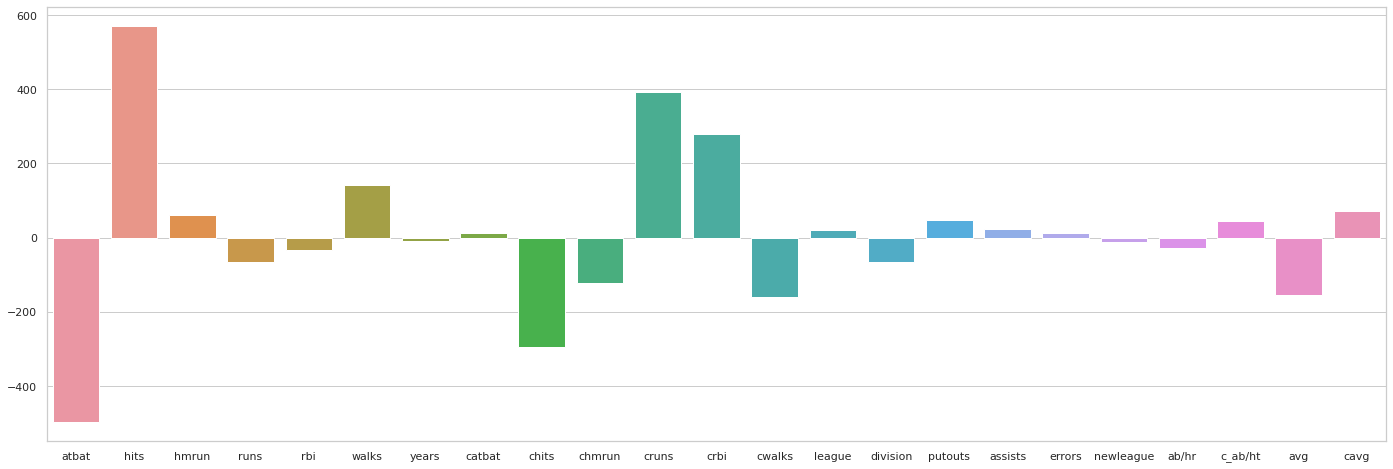

In [31]:
importance = lm.coef_
sns.barplot(x=X.columns, y=importance)
plt.show()

<a id='formula'></a>
<h4 style='font-family:Bahnschrift'>Formula</h4>

In [32]:
f"{lm.intercept_} + " + " + ".join(f"{col}*{imp}" for col, imp in zip(X.columns, importance))

'525.136213319288 + atbat*-496.37731944594293 + hits*569.7391158206274 + hmrun*61.2055586282097 + runs*-66.16369373018429 + rbi*-34.774925606633616 + walks*140.49612475345774 + years*-8.615507734452299 + catbat*11.422388539550962 + chits*-296.4771208533258 + chmrun*-122.33061001911756 + cruns*391.320954823301 + crbi*278.4507966424934 + cwalks*-160.16321517795296 + league*19.04502487688246 + division*-66.3287993869622 + putouts*47.838221458145696 + assists*22.094904661217416 + errors*12.474195147581156 + newleague*-11.296813341665304 + ab/hr*-28.33232866218855 + c_ab/ht*45.83616366468931 + avg*-154.77846094312142 + cavg*70.32349822293433'

<h1 style='text-align:center; font-family:Bahnschrift'>THANKS FOR READING...</h1>